<h1><center><span style='font-family:Monotype Corsiva'><font size="300">Diamonds</font></span></center></h1>

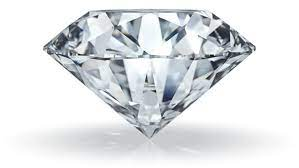


In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [487]:
#load the dataset
data=pd.read_csv(r'C:\Users\נעמיה\diamonds.csv')
#get information about the data features, the amount of instances and the amount of Nan values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [488]:
#first look
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### As you can see the column "Unnamed: 0" is an unnecessary index column. We will now delete it from the data.

In [489]:
data=data.drop(columns='Unnamed: 0')

#### We will now apply the "describe()" function to get a general impression of the number ranges in each feature in the data.

In [490]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### You can see that there are '0' values in the 'x', 'y', 'z' features. These values are invalid so I will delete them.

In [491]:
data = data.drop(data.loc[data.x == 0].index)
data = data.drop(data.loc[data.y == 0].index)
data = data.drop(data.loc[data.z == 0].index)

In [492]:
#apply 'Describe()' again for information about valid values.
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 0, 'Z Label')

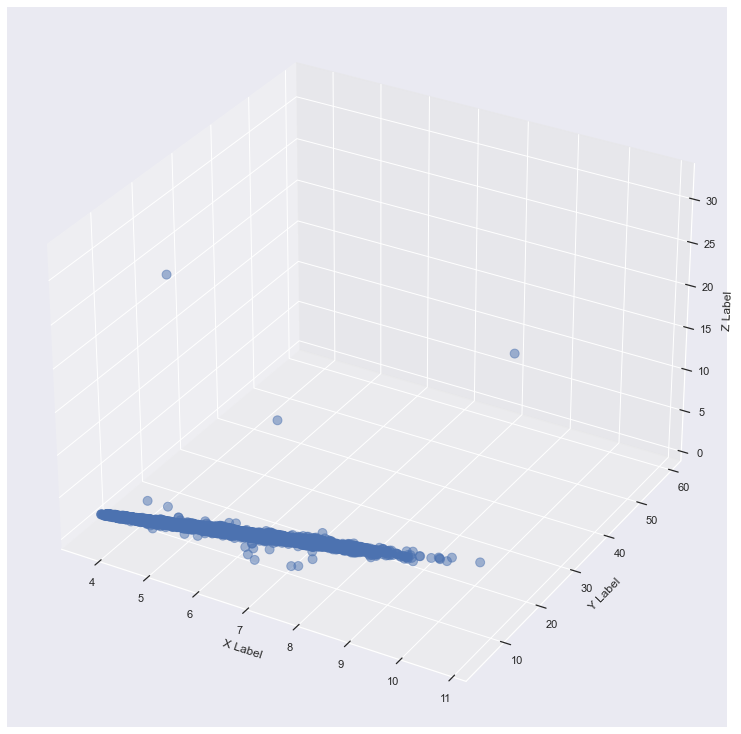

In [493]:


fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot
ax.scatter(xs=data['x'], ys=data['y'], zs=data['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [494]:
data = data.drop(data.loc[data.y > 35].index)
data = data.drop(data.loc[data.z > 25].index)

In [ ]:
data['volume']=data['x']*data['y']*data['z']
data

<AxesSubplot:xlabel='color', ylabel='price'>

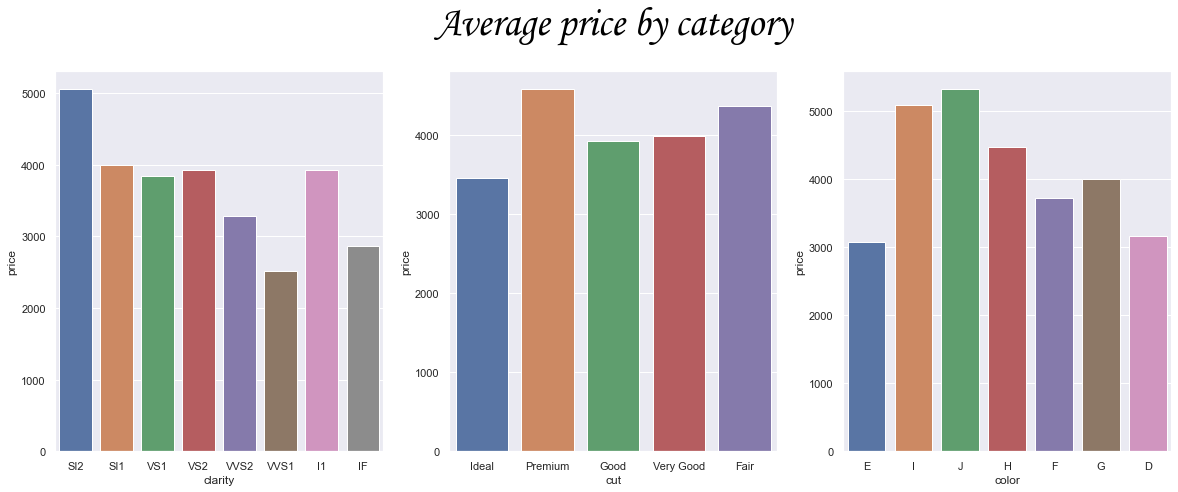

In [495]:
f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=False)

sns.barplot(x="clarity",y="price", data=data,ci =0,ax=axes[ 0])

sns.barplot(x="cut",y="price", data=data,ci =0,ax=axes[ 1])
axes[1].set_title('Average price by category',y=1.08,fontdict={'fontsize': 40,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})

sns.barplot(x="color",y="price", data=data,ci =0,ax=axes[ 2])


In [496]:
# with sns.axes_style('dark'):
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=False)
# sns.set(rc={'figure.figsize':(10,5)})

sns.regplot(x="volume", y="price", data=data,ax=axes[0], fit_reg=True, scatter_kws={"color": "khaki"}, line_kws={"color": "goldenrod"})
sns.regplot(x="volume", y="carat", data=data,ax=axes[1], fit_reg=True, scatter_kws={"color": "salmon"}, line_kws={"color": "maroon"})
axes[1].set_title('Volume - Carat',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
axes[0].set_title('Volume - Price',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
axes[1].text(250,0.5, "In general the carat of a diamond increases\n as its volume increases",size=15)
axes[0].text(55,20200, "Diamonds with a price of 100,000\n or more, have a volume of at\n least 150",size=15)
axes[0].axvline(150, ls='--',ymax=0.5)


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


Text(0.5, 1.0, 'Low: Price - Volume')

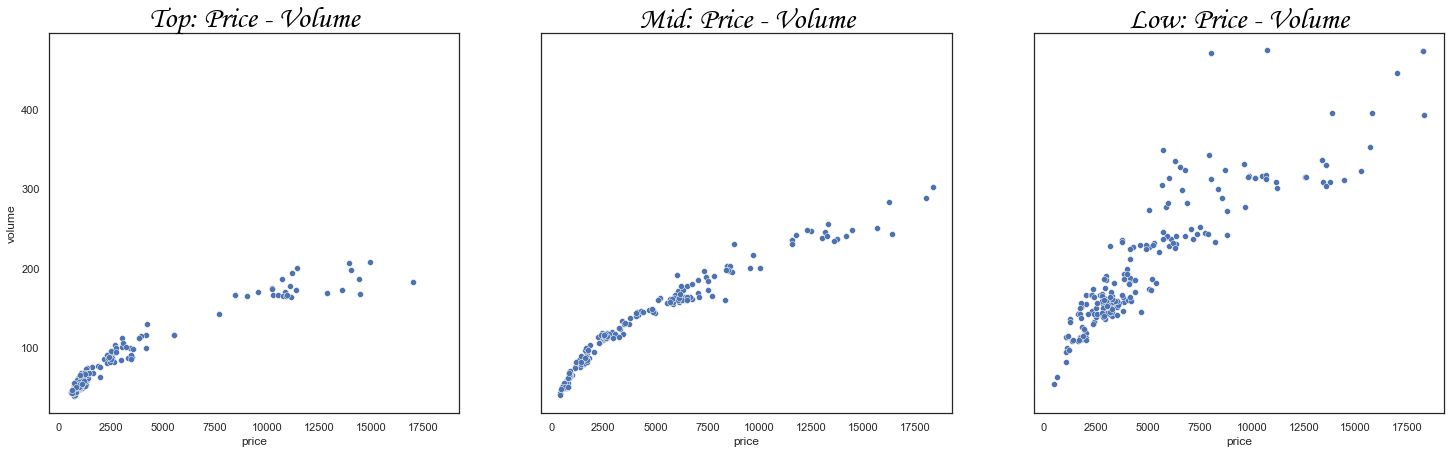

In [584]:
top=data[(data['color'].isin(['D','E']))& (data['cut'].isin(['Ideal','Premium']))& (data['clarity'].isin(['IF','VVS1','VVS2']))]
mid=data[(data['color'].isin(['F','G']))& (data['cut'].isin(['Good','Very Good']))& (data['clarity'].isin(['VS1','VS2']))]
low=data[(data['color'].isin(['H','I','J']))& (data['cut'].isin(['Fair']))& (data['clarity'].isin(['SI1','SI2','I1']))]
sns.set_style(style='white')
t=top.sample(n=200)
m=mid.sample(n=200)
l=low.sample(n=200)
f, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True,sharex=True)
ax = sns.scatterplot(x=t['price'], y=t['volume'],ax=axes[0])
axes[0].set_title('Top: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
ax = sns.scatterplot(x=m['price'],y=m['volume'],ax=axes[1])
axes[1].set_title('Mid: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
ax = sns.scatterplot(x=l['price'],y=l['volume'],ax=axes[2])
axes[2].set_title('Low: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})

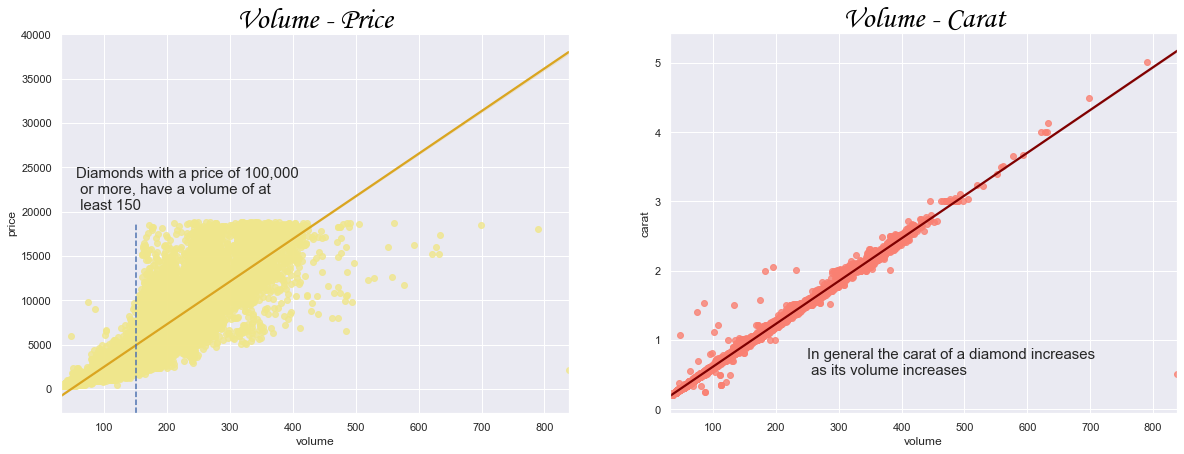

<AxesSubplot:xlabel='cut', ylabel='count'>

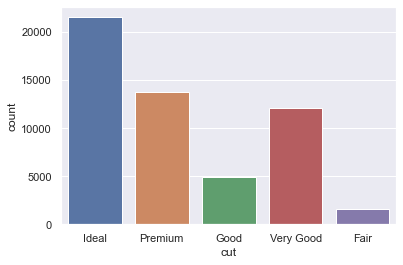

In [408]:
sns.countplot(x = data.cut)

In [477]:
num_cut = {'Fair':0,'Good':1,'Very Good':2, 'Premium':3,'Ideal':4}
num_color = {'J':0,'I':1, 'H':2,'G':3,'F':4,'E':5,'D':6}
num_clarity = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}

In [478]:
data['cut'] = data['cut'].map(num_cut);
data['color'] = data['color'].map(num_color);
data['clarity'] = data['clarity'].map(num_clarity);

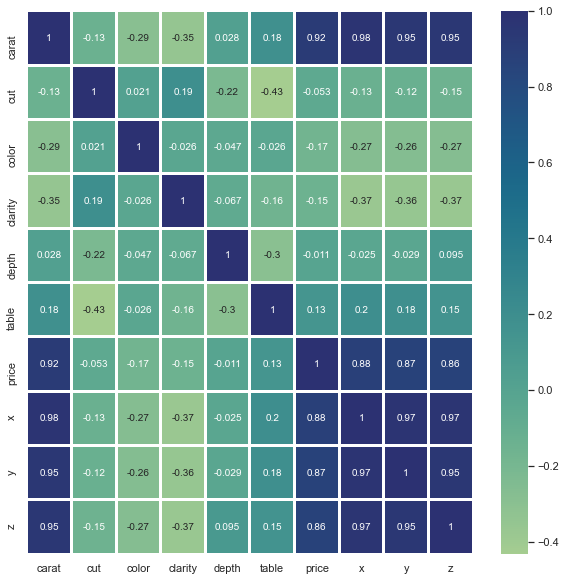

In [458]:
correlation= data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,cmap="crest",annot=True,linewidths=2)

plt.show()

In [459]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'],1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [460]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
x=reg.predict(X_test)
reg.score(X_test, y_test)

0.9056643685073513

In [461]:
 from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
# DummyRegressor()
x=dummy_regr.predict(X_test)
dummy_regr.score(x, y_test)


-7.04060323410971e-05

In [462]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 5,verbose = 0)
print('Linear regression accuracy: ', reg.score(X_test,y_test))
print(accuracies)

Linear regression accuracy:  0.9056643685073513
[0.90907929 0.90485918 0.90072367 0.9116797  0.90926813]


In [463]:
from sklearn.metrics import mean_squared_error
mm = reg.predict(X_test)
lin_mse = mean_squared_error(y_test, mm)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


1224.5965418579538

In [300]:
df=data[data['color']=='D'][data['cut']=='Ideal'][data['clarity']=='VVS2']

<ipython-input-300-d1242e7d6738>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=data[data['color']=='D'][data['cut']=='Ideal'][data['clarity']=='VVS2']


<AxesSubplot:xlabel='carat', ylabel='price'>

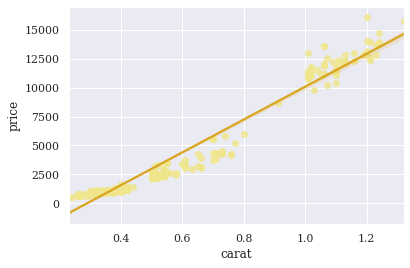

In [301]:
sns.regplot(x="carat", y="price", data=df, fit_reg=True, scatter_kws={"color": "khaki"}, line_kws={"color": "goldenrod"})


In [464]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, x))

3020.5058390529985
